In [1]:
#Import Libraries
import dask.dataframe as dd
import pandas as pd

In [2]:
#Converts dataframe to Pandas dataframe
filepath = (r"C:\Users\cijos\Downloads\Crimes_-_2001_to_Present (1).csv")
dsk_df = dd.read_csv(filepath, low_memory = False, dtype = {'FBI Code': 'object', 'District': 'float64','Community Area': 'object', 'IUCR': 'object', 'Ward': 'object'})
dsk_df = dsk_df.compute()

In [3]:
dsk_df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,11712642,JC294069,2018-03-01 00:00:00,059XX S WESTERN AVE,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,False,...,16,66,06,NaN,NaN,2018,06/06/2019 04:10:57 PM,NaN,NaN,NaN
1,1,11243872,JB169468,2020-06-27 14:30:00,007XX E 78TH ST,0890,THEFT,FROM BUILDING,STREET,False,...,6,69,06,1182831.0,1853461.0,2018,05/04/2018 03:51:04 PM,41.753101,-87.605562,"(41.753101394, -87.605561923)"
2,2,11244055,JB169724,2019-04-11 23:51:00,069XX S PAXTON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,5,43,11,1192078.0,1859351.0,2018,05/04/2018 03:51:04 PM,41.769044,-87.571485,"(41.769044383, -87.571484631)"
3,3,11249506,JB176953,2021-11-17 00:55:00,033XX N KIMBALL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,...,35,21,11,1153125.0,1922186.0,2018,05/04/2018 03:51:04 PM,41.942329,-87.712603,"(41.942329044, -87.712603127)"
4,4,11254111,JB183269,2020-06-27 14:30:00,067XX S NORMAL BLVD,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,RESIDENCE,False,...,6,68,11,1174118.0,1859976.0,2018,05/04/2018 03:51:04 PM,41.771177,-87.637298,"(41.771177146, -87.637298335)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295795,295787,12990486,JG161680,2019-04-11 23:30:00,090XX S GREENWOOD AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,8,47,07,1185126.0,1845289.0,2023,02/28/2023 03:53:58 PM,41.730623,-87.597408,"(41.730622986, -87.597407838)"
295796,295788,12990237,JG161361,2019-04-11 23:30:00,047XX S SEELEY AVE,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,True,...,15,61,26,1163490.0,1873267.0,2023,02/28/2023 03:53:58 PM,41.807879,-87.675884,"(41.807878777, -87.675884293)"
295797,295789,12990211,JG161365,2019-04-11 23:30:00,131XX S CORLISS AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,SIDEWALK,False,...,9,54,15,1184011.0,1818278.0,2023,02/28/2023 03:53:58 PM,41.656527,-87.602332,"(41.656527347, -87.602332158)"
295798,295790,12990628,JG161878,2019-04-11 23:40:00,046XX W IRVING PARK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,...,45,15,06,1144295.0,1926174.0,2023,02/28/2023 03:53:58 PM,41.953443,-87.744957,"(41.953443342, -87.744957048)"


In [4]:
# List column names
dsk_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
# Overview of the dataset
dsk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1183311 entries, 0 to 295799
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1183311 non-null  int64  
 1   ID                    1183311 non-null  int64  
 2   Case Number           1183311 non-null  object 
 3   Date                  1183311 non-null  object 
 4   Block                 1183311 non-null  object 
 5   IUCR                  1183311 non-null  object 
 6   Primary Type          1183311 non-null  object 
 7   Description           1183311 non-null  object 
 8   Location Description  1178132 non-null  object 
 9   Arrest                1183311 non-null  bool   
 10  Domestic              1183311 non-null  bool   
 11  Beat                  1183311 non-null  int64  
 12  District              1183311 non-null  float64
 13  Ward                  1183262 non-null  object 
 14  Community Area        1183310 non-n

In [6]:
# Look for null values
dsk_df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     5179
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                       49
Community Area              1
FBI Code                    0
X Coordinate            20027
Y Coordinate            20027
Year                        0
Updated On                  0
Latitude                20027
Longitude               20027
Location                20027
dtype: int64

In [7]:
#Export the results to csv
dsk_df.to_csv("Crimes_-_2001_to_Present (1).csv")

In [8]:
# Print the data by primary crime type, case number, description, date, location, year, arrest
crime_data = dsk_df[['Primary Type', 'Case Number', 'Description', 'Date', 'Location Description', 'Year', 'Arrest']]
crime_data

,Primary Type,Case Number,Description,Date,Location Description,Year,Arrest
0,THEFT,JC294069,FROM BUILDING,2018-03-01 00:00:00,COMMERCIAL / BUSINESS OFFICE,2018,False
1,THEFT,JB169468,FROM BUILDING,2020-06-27 14:30:00,STREET,2018,False
2,DECEPTIVE PRACTICE,JB169724,FINANCIAL IDENTITY THEFT OVER $ 300,2019-04-11 23:51:00,APARTMENT,2018,False
3,DECEPTIVE PRACTICE,JB176953,FINANCIAL IDENTITY THEFT OVER $ 300,2021-11-17 00:55:00,OTHER,2018,False
4,DECEPTIVE PRACTICE,JB183269,AGGRAVATED FINANCIAL IDENTITY THEFT,2020-06-27 14:30:00,RESIDENCE,2018,False
...,...,...,...,...,...,...,...
295795,MOTOR VEHICLE THEFT,JG161680,AUTOMOBILE,2019-04-11 23:30:00,STREET,2023,False
295796,OTHER OFFENSE,JG161361,VIOLATE ORDER OF PROTECTION,2019-04-11 23:30:00,RESIDENCE,2023,True
295797,WEAPONS VIOLATION,JG161365,RECKLESS FIREARM DISCHARGE,2019-04-11 23:30:00,SIDEWALK,2023,False
295798,THEFT,JG161878,RETAIL THEFT,2019-04-11 23:40:00,GROCERY FOOD STORE,2023,False


In [9]:
# Number of observations for each crime
dsk_df2= crime_data['Primary Type'].value_counts()
dsk_df2

THEFT                                262692
BATTERY                              220798
CRIMINAL DAMAGE                      131897
ASSAULT                              100361
DECEPTIVE PRACTICE                    88688
OTHER OFFENSE                         74490
MOTOR VEHICLE THEFT                   63752
NARCOTICS                             44357
BURGLARY                              43788
ROBBERY                               42242
WEAPONS VIOLATION                     38412
CRIMINAL TRESPASS                     25057
OFFENSE INVOLVING CHILDREN            10403
SEX OFFENSE                            5767
PUBLIC PEACE VIOLATION                 5403
CRIMINAL SEXUAL ASSAULT                5394
INTERFERENCE WITH PUBLIC OFFICER       4106
HOMICIDE                               3418
ARSON                                  2322
CRIM SEXUAL ASSAULT                    2190
PROSTITUTION                           2081
STALKING                               1473
LIQUOR LAW VIOLATION            

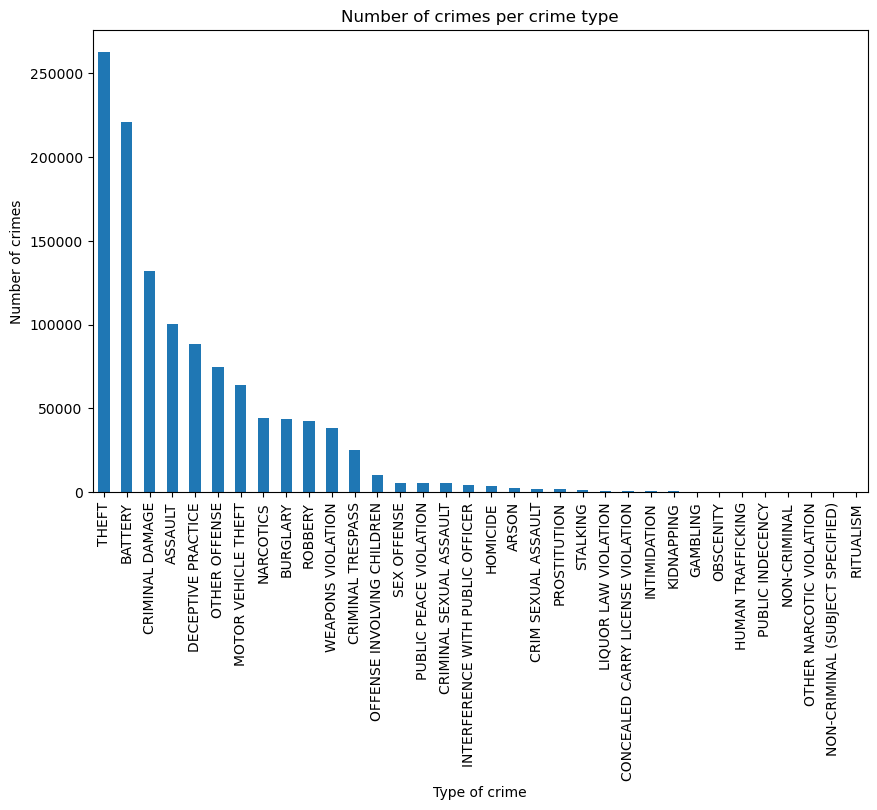

In [10]:
# Looking for number of crimes per type of crime
import matplotlib.pyplot as plt
#Create a bar-chart
# Kind of chart and its size
dsk_df2.plot(kind='bar', figsize=(10,6))
# Add a label for the x axis
plt.xlabel("Type of crime")
# Add a label for the y axis
plt.ylabel("Number of crimes")
# Add a title for your chart
plt.title("Number of crimes per crime type")
# Plot the chart
plt.show()

In [11]:
# Crimes per year
dsk_df3= crime_data['Year'].value_counts()
dsk_df3

2019    261211
2022    237104
2018    230829
2020    212037
2021    208427
2023     33703
Name: Year, dtype: int64

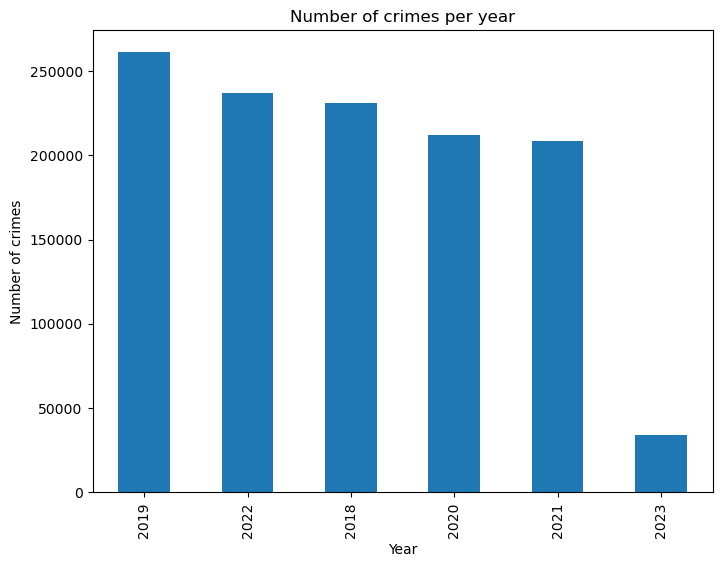

In [12]:
#Looking for number of crimes per year
import matplotlib.pyplot as plt
#Create a bar-chart
# Kind of chart and its size
dsk_df3.plot(kind='bar', figsize=(8,6))
# Add a label for the x axis
plt.xlabel("Year")
# Add a label for the y axis
plt.ylabel("Number of crimes")
# Add a title for your chart
plt.title("Number of crimes per year")
# Plot the chart
plt.show()

In [13]:
# Crimes per location
crime_location = crime_data.groupby(['Location Description'])[['Primary Type']].count()
crime_location

,Primary Type
Location Description,
ABANDONED BUILDING,892
AIRCRAFT,260
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,571
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,301
AIRPORT EXTERIOR - NON-SECURE AREA,405
...,...
VEHICLE-COMMERCIAL - TROLLEY BUS,9
VESTIBULE,10
WAREHOUSE,1108


In [14]:
# Sort the data in descending order
crime_location1= crime_location.sort_values(by=[('Primary Type')], ascending=False)
crime_location1.reset_index()

,Location Description,Primary Type
0,STREET,287839
1,APARTMENT,196951
2,RESIDENCE,186905
3,SIDEWALK,78026
4,SMALL RETAIL STORE,32018
...,...,...
181,CHA ELEVATOR,1
182,PUBLIC GRAMMAR SCHOOL,1
183,TRUCK,1
184,POLICE FACILITY,1


In [15]:
#Top 10 rows
location= crime_location1.head(10)
location

,Primary Type
Location Description,
STREET,287839
APARTMENT,196951
RESIDENCE,186905
SIDEWALK,78026
SMALL RETAIL STORE,32018
RESTAURANT,25945
ALLEY,24902
PARKING LOT / GARAGE (NON RESIDENTIAL),21995
OTHER,21178


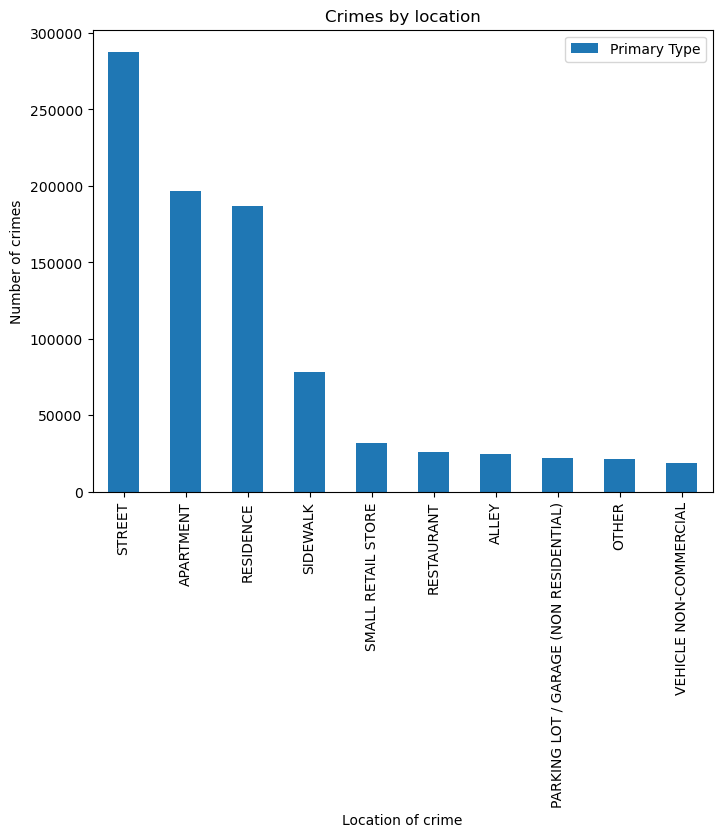

In [16]:
#Looking for number of crimes by location
import matplotlib.pyplot as plt
#Create a bar-chart
# Kind of chart and its size
location.plot(kind='bar', figsize=(8,6))
# Add a label for the x axis
plt.xlabel("Location of crime")
# Add a label for the y axis
plt.ylabel("Number of crimes")
# Add a title for your chart
plt.title("Crimes by location")
# Plot the chart
plt.show()

In [17]:
# Count the number of arrest
arrest_made = dsk_df['Arrest'].value_counts()
arrest_made

False    990310
True     193001
Name: Arrest, dtype: int64

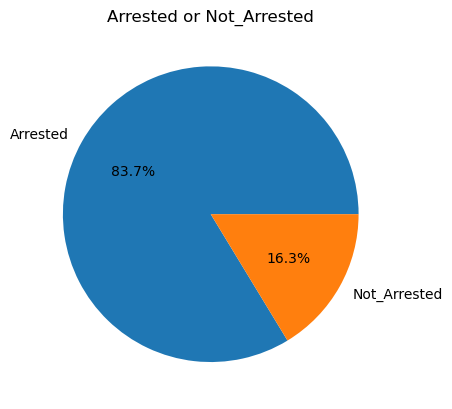

In [18]:
#Percentage of arrests made
# Plot pie chart 
plt.pie(arrest_made, labels = ['Arrested', 'Not_Arrested'], autopct = '%1.1f%%')
plt.title('Arrested or Not_Arrested')
plt.show()